In this tutotorial, we will see some real applications of RNN. We will have two examples. One for sequence prediction using the IMDB data. The other would be using RNN for time series forecasting.

In [0]:
# pip install tensorflow==2.7

Python interpreter will be restarted.
Collecting tensorflow==2.7
 Downloading tensorflow-2.7.0-cp38-cp38-manylinux2010_x86_64.whl (489.6 MB)
Requirement already satisfied: opt-einsum>=2.3.2 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (3.3.0)
Collecting tensorflow-io-gcs-filesystem>=0.21.0
 Downloading tensorflow_io_gcs_filesystem-0.27.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
Requirement already satisfied: tensorboard~=2.6 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (2.6.0)
Requirement already satisfied: flatbuffers<3.0,>=1.12 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (1.12)
Collecting libclang>=9.0.1
 Downloading libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
Requirement already satisfied: wrapt>=1.11.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (1.12.1)
Requirement already satisfied: gast<0.5.0,>=0.2.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (0.4.0)
Requirement already satisfied: six>=1.12.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (1.15.0)
Requirement already satisfied: keras-preprocessing>=1.1.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (1.1.2)
Requirement already satisfied: grpcio<2.0,>=1.24.3 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (1.39.0)
Requirement already satisfied: typing-extensions>=3.6.6 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (3.7.4.3)
Collecting keras<2.8,>=2.7.0rc0
 Downloading keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
Requirement already satisfied: protobuf>=3.9.2 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (3.17.2)
Collecting tensorflow-estimator<2.8,~=2.7.0rc0
 Downloading tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
Requirement already satisfied: wheel<1.0,>=0.32.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (0.36.2)
Requirement already satisfied: h5py>=2.9.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (3.1.0)
Requirement already satisfied: termcolor>=1.1.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (1.1.0)
Requirement already satisfied: google-pasta>=0.1.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (0.2.0)
Requirement already satisfied: absl-py>=0.4.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (0.11.0)
Requirement already satisfied: numpy>=1.14.5 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (1.19.2)
Requirement already satisfied: astunparse>=1.6.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.7) (1.6.3)
Requirement already satisfied: markdown>=2.6.8 in /databricks/python3/lib/python3.8/site-packages (from tensorboard~=2.6->tensorflow==2.7) (3.3.3)
Requirement already satisfied: google-auth<2,>=1.6.3 in /databricks/python3/lib/python3.8/site-packages (from tensorboard~=2.6->tensorflow==2.7) (1.22.1)
Requirement already satisfied: setuptools>=41.0.0 in /usr/local/lib/python3.8/dist-packages (from tensorboard~=2.6->tensorflow==2.7) (52.0.0)
Requirement already satisfied: werkzeug>=0.11.15 in /databricks/python3/lib/python3.8/site-packages (from tensorboard~=2.6->tensorflow==2.7) (1.0.1)
Requirement already satisfied: google-auth-oauthlib<0.5,>=0.4.1 in /databricks/python3/lib/python3.8/site-packages (from tensorboard~=2.6->tensorflow==2.7) (0.4.2)
Requirement already satisfied: tensorboard-data-server<0.7.0,>=0.6.0 in /databricks/python3/lib/python3.8/site-packages (from tensorboard~=2.6->tensorflow==2.7) (0.6.1)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.8/site-packages (from tensorboard~=2.6->tensorflow==2.7) (2.25.1)
Requirement already satisfied: tensorboard-plugin-wit>=1.6.0 in /databricks/

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import math

from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [0]:
#path="C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets"
path="C:\\Users\\GAO\\python workspace\\GAO_Jupyter_Notebook\\Datasets"
os.chdir(path)

#path="C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\Introduction to Data Science Using Python\\datasets"
#os.chdir(path)

print("TensorFlow Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

TensorFlow Version:  2.7.0
Eager mode:  True
GPU is NOT AVAILABLE


### I. A Sequence Prediction Problem (Classification)

In this section, let's use an LSTM layer and train it on the IMDB dataset. This is a dataset containing 25000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words". As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

The tf.keras.datasets.imdb.load_data() function has several arguments:
   
   - _num\_words_: integer or _None_. Words are ranked by how often they occur (in the training set) and only the _num\_words_ most frequent words are kept. Any less frequent word will appear as whatever the 'oov_char' value indicates in the sequence data. If _None_, all words are kept. The default value is _None_, so all words are kept.
   - _skip_\top_: this skips the top $N$ most frequently occurring words (which may not be informative). These words will appear as _oov\_char_ value in the dataset. Defaults to 0, so no words are skipped.
   - _maxlen_: int or _None_. This is the maximum sequence length. Any longer sequence will be truncated. Default value is _None_, which means no truncation.
   - _oov\_char_: int. This indicates the out-of-vocabulary character. Words that were cut out because of the _num\_words_ or _skip\_top_ limits will be replaced with this character.

We will only specify the output dimensionaltiy of the LSTM layer and leave every other argument at the default value. Let's first prepare the dataset.

In [0]:
max_features=10000 # number of words to consider as features
maxlen=500 # cutting off texts after this many words (among the max_features most common words)
batch_size=32

(X_train, y_train), (X_test, y_test)=imdb.load_data(num_words=max_features)
print(type(y_train))
X_train.shape

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\GAO\.conda\envs\gao_uat\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


<class 'numpy.ndarray'>


C:\Users\GAO\.conda\envs\gao_uat\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Out[4]: (25000,)

Notice that the training and test datasets are 'ndarrays' objects. So it doesn't indicate the actual words. Let's retrieve the word index file mapping words to indices. And then let's look at the first 10 words (not sorted by frequency):

In [0]:
word_index = imdb.get_word_index() # this resolves to a dictionary
first_n_pairs = {k: word_index[k] for k in list(word_index)[:10]}
first_n_pairs

Out[5]: {'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008}

Next let's clean the data a bit by introducing the tf.keras.preprocessing.sequence.pad_sequences() function in TensorFlow. This function pads sequences to the same length. To understand what it does, it would be helpful if we can go over the concept of **masking** and **padding** in Keras. Masking is a way to tell sequence-processing layers that certain timesteps in an input are missing, and thus should be skipped when processing the data. Meanwhile, padding is a special form of masking where the masked steps are at the start or the end of a sequence. Padding comes from the need to encode sequence data into contiguous batches: in order to make all sequences in a batch fit a given standard length, it is necessary to pad or truncate some sequences.

Let's take a close look at padding. When processing sequence data, it is very common for individual samples to have different lengths. Consider the following example (text tokenized as words). After vocabulary lookup, the data might be vectorized as integers:

In [0]:
tokens=[["Hello", "world", "!"], 
        ["How", "are", "you", "doing", "today"],
        ["The", "weather", "will", "be", "nice", "tomorrow"]
       ]
vectorized_tokens=[[71, 1331, 4231], 
                   [73, 8, 3215, 55, 927],
                   [83, 91, 1, 645, 1253, 927],
                  ]

The data is a nested list where individual samples have length 3, 5, and 6, respectively. Since the input data for a deep learning model must be a single tensor (of shape e.g. (batch_size, 6, vocab_size) in this case), samples that are shorter than the longest item need to be padded with some placeholder value (alternatively, one might also truncate long samples before padding short samples). This is where the tf.keras.preprocessing.sequence.pad_sequences() kicks in:

In [0]:
# By default, this will pad using 0s; it is configurable via the
# "value" parameter.
# Note that you could "pre" padding (at the beginning) or
# "post" padding (at the end).
# We recommend using "post" padding when working with RNN layers
# (in order to be able to use the
# CuDNN implementation of the layers).
padded_inputs = sequence.pad_sequences(vectorized_tokens, padding="post")
print(padded_inputs)

[[  71 1331 4231    0    0    0]
 [  73    8 3215   55  927    0]
 [  83   91    1  645 1253  927]]


Now that all samples have a uniform length after we padded the sequence, the model must be informed that some part of the data is actually padded and should be ignored. That mechanism is masking.

There are three ways to introduce input masks in Keras models:

   - Adding a 'keras.layers.Masking' layer
   - Configuring a 'keras.layers.Embedding' layer with _mask\_zero=True_
   - Passing a mask argument manually when calling layers that support this argument (e.g. RNN layers).
   
Now let's look at some examples. Under the hood, the layers below will create a mask tensor (2D tensor with shape (batch, sequence_length)), and attach it to the tensor output returned by the 'Masking' or 'Embedding' layer:

In [0]:
embedding = layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True)
masked_output = embedding(padded_inputs)

print(masked_output._keras_mask)

tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)


As you can see from the printed result, the mask is a 2D boolean tensor with shape (batch_size, sequence_length), where each individual False entry indicates that the corresponding timestep should be ignored during processing.

Here is another way to do this:

In [0]:
masking_layer = layers.Masking() # simulating the embedding lookup by expanding the 2D input to 3D, with embedding dimension of 10.
unmasked_embedding = tf.cast( # casting a tensor to a new type
    tf.tile(tf.expand_dims(padded_inputs, axis=-1), [1, 1, 10]), tf.float32) # tiling a tensor

masked_embedding = masking_layer(unmasked_embedding)
print(masked_embedding._keras_mask)

tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)


Now let's go back to our original problem and pad the sequences:

In [0]:
X_train=sequence.pad_sequences(X_train, maxlen=maxlen)
X_test=sequence.pad_sequences(X_test, maxlen=maxlen)

print('Train sequences length:', len(X_train))
print('Test sequences length:', len(X_test))

print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

Train sequences length: 25000
Test sequences length: 25000
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Now we are done with preprocessing. Let's build the model:

In [0]:
model=Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
history=model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 111s 687ms/step - loss: 0.6039 - acc: 0.6661 - val_loss: 0.4064 - val_acc: 0.8364
Epoch 2/20
157/157 [==============================] - 105s 668ms/step - loss: 0.3126 - acc: 0.8781 - val_loss: 0.3489 - val_acc: 0.8734
Epoch 3/20
157/157 [==============================] - 105s 669ms/step - loss: 0.2366 - acc: 0.9123 - val_loss: 0.2918 - val_acc: 0.8884
Epoch 4/20
157/157 [==============================] - 103s 658ms/step - loss: 0.2106 - acc: 0.9250 - val_loss: 0.3323 - val_acc: 0.8890
Epoch 5/20
157/157 [==============================] - 102s 651ms/step - loss: 0.1691 - acc: 0.9388 - val_loss: 0.5185 - val_acc: 0.8246
Epoch 6/20
157/157 [==============================] - 103s 654ms/step - loss: 0.1548 - acc: 0.9452 - val_loss: 0.4333 - val_acc: 0.8284
Epoch 7/20
157/157 [==============================] - 103s 654ms/step - loss: 0.1522 - acc: 0.9478 - val_loss: 0.3263 - val_acc: 0.8838
Epoch 8/20
157/157 [============================

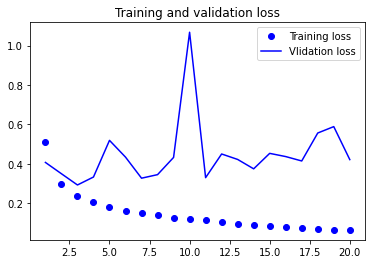

In [0]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Vlidation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Notice that we have an embedding layer "tf.keras.layers.Embedding()" in the network topology. The embedding layer essentially turns positive integers (indexes) into dense vectors of fixed size. This layer can only be used as the first layer in a model. For this model:

   - Input shape: 2D tensor with shape: (_batch_size_, _input\_length_).
   - Output shape: 3D tensor with shape: (_batch_size_, _input\_length_, _output\_dim_).
   
Here is an example below. The model will take as input as integer-matrix of size (_batch_, _input_length_), and the largest integer (i.e. the word index) in the put should be no larger than 999 (vocabulary size):

In [0]:
model_test = tf.keras.Sequential()
model_test.add(Embedding(input_dim=1000, output_dim=64, input_length=10))

input_array = np.random.randint(1000, size=(32, 10))
model_test.compile('rmsprop', 'mse')
output_array = model_test.predict(input_array)
print(output_array.shape)

(32, 10, 64)


The embedding layer, indicated by Embedding() above, can be understood as a lookup table that maps from integer indices (which stand for specific words) to dense vectors (their embeddings). The dimensionality (or width) of the embedding is a parameter we can experiment with to see what works well for your problem, much in the same way you would experiment with the number of neurons in a Dense() layer.

When we create an Embedding() layer, the weights for the embedding are randomly initialized (just like any other layer). During training, they are gradually adjusted via backpropagation. Once trained, the learned word embeddings will roughly encode similarities between words (as they were learned for the specific problem our model is trained on).

If we pass an integer to an embedding layer, the result replaces each integer with the vector from the embedding table:

In [0]:
el = tf.keras.layers.Embedding(1000, 5) # embedding 1000 words vocab into 5 dimensions
result = el(tf.constant([1, 2, 3]))
result.numpy()

Out[23]: array([[ 0.04690755, -0.04064342,  0.00331582, -0.03106552, -0.0228973 ],
       [-0.04246771,  0.02117674, -0.03863517,  0.002216  ,  0.0115139 ],
       [ 0.01423153,  0.02260449,  0.02157952,  0.02736515,  0.00267745]],
      dtype=float32)

### II. A Time Series Forecasting Problem (Regression)

In this example, we will use the Beijing PM2.5 pollution dataset for a multivariate time series forecasting problem. The dataset can be found here:

   - https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv.
   
We will use LSTM for the prediction. This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China. The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. The complete feature list in the raw data is as follows:

   - No: row number
   - year: year of data in this row
   - month: month of data in this row
   - day: day of data in this row
   - hour: hour of data in this row
   - pm2.5: PM2.5 concentration
   - DEWP: Dew Point
   - TEMP: Temperature
   - PRES: Pressure
   - cbwd: Combined wind direction
   - Iws: Cumulated wind speed
   - Is: Cumulated hours of snow
   - Ir: Cumulated hours of rain
   
We can use this data and frame a forecasting problem where, given the weather conditions and pollution for prior hours, we forecast the pollution at the next hour.

In [0]:
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

dataset=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv", parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.head()

Out[2]:

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Now let's clean the data. We will drop the first column and then rename some of the columns. And then we will fill missing data with 0 on the 'pollution' column (PM2.5). We will also drop the first 24 hours of data.

In [0]:
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset.head()

Out[3]:

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [0]:
dataset['pollution'].fillna(0, inplace=True) # marking all NA values with 0
dataset = dataset[24:] # dropping the first 24 hours of data
dataset.head()

Out[4]:

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


Now that we have the data in an easy-to-use form, we can do some simple EDA and create a quick plot of each series and see what we have:

In [0]:
print('Time range for the dataset: ', dataset.index.min(), '-', dataset.index.max())
print('Number of unique time stamps in the dataset: ', len(set(dataset.index)))
print('Number of records in the dataset: ', len(dataset))
print('Missing values (counts):')
print(dataset.isnull().sum())

Time range for the dataset: 2010-01-02 00:00:00 - 2014-12-31 23:00:00
Number of unique time stamps in the dataset: 43800
Number of records in the dataset: 43800
Missing values:
pollution 0
dew 0
temp 0
press 0
wnd_dir 0
wnd_spd 0
snow 0
rain 0
dtype: int64

[129.0 -16 -4.0 1020.0 'SE' 1.79 0 0]

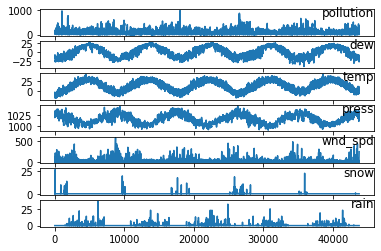

In [0]:
values = dataset.values
print(values[0]) # this is an array: array([129.0, -16, -4.0, 1020.0, 'SE', 1.79, 0, 0], dtype=object)

groups = [0, 1, 2, 3, 5, 6, 7] # specifying columns to plot
i = 1
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

We will now use the LSTM framework to forecast. The first step is to prepare the pollution dataset. We will frame the supervised learning problem as predicting the pollution at the current hour (t) given the pollution measurement and weather conditions at the prior time step. Below, we create a user-defined function that frames a time series as a supervised learning dataset. The arguments of the function include:

   - 'data': sequence of observations as a list or a numpy array
   - 'n_in': number of lag observations as input
   - 'n_out': number of observations as output
   - 'dropnan': Boolean whether or not to drop rows with NaN values.
 
The function will return a 'DataFrame' object of series laid out for supervised learning. After this we will standardize the data and prepare for the final dataset. Below, running the example prints the first 5 rows of the transformed dataset. We can see the 8 input variables (input series) and the 1 output variable (pollution level at the current hour).

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):   
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1):
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n):
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = pd.concat(cols, axis=1) # putting it all together
	agg.columns = names
	if dropnan: # dropping rows with NaN values
		agg.dropna(inplace=True)
	return agg

In [0]:
values[:, 4]

Out[14]: array(['SE', 'SE', 'SE', ..., 'NW', 'NW', 'NW'], dtype=object)

In [0]:
encoder = LabelEncoder() # integer encoding direction
values[:,4] = encoder.fit_transform(values[:,4]) # the 5th column is character so we need to encode them with integers
values = values.astype('float32') # ensuring all data is float

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
type(scaled)

Out[15]: numpy.ndarray

In [0]:
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

Out[19]:

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


Now we must split the prepared dataset into train and test sets. To speed up the training of the model for this demonstration, we will only fit the model on the first year of data, then evaluate it on the remaining years of data. The example below splits the dataset into train and test sets, then splits the train and test sets into input and output variables. Finally, the inputs are reshaped into the 3D format expected by LSTMs, namely [_samples_, _timesteps_, _features_].

In [0]:
values = reframed.values
print(type(values))
print(values[0], '\n')

n_train_hours = 365 * 24 # first year
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X[: 0]

<class 'numpy.ndarray'>
[0.12977867 0.35294122 0.24590163 0.5272732 0.6666667 0.00229001
 0. 0. 0.14889336] 

Out[20]: array([], shape=(0, 8), dtype=float32)

In [0]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1])) # reshaping input to be 3D
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1])) # reshaping input to be 3D
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)

Now we can define and fit our LSTM model. We will define the LSTM with 50 neurons in the first hidden layer and one neuron in the output layer for predicting pollution. The input shape will be 1 time step with 8 features. We will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent. The model will be fit for 30 training epochs with a batch size of 36. Remember that the internal state of the LSTM in Keras is reset at the end of each batch, so an internal state that is a function of a number of days may be helpful.

In [0]:
model = Sequential()
model.add(LSTM(50, dropout=0.02, input_shape=(train_X.shape[1], train_X.shape[2]))) # dropping too much may not be ideal
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type) Output Shape Param # 
=================================================================
 lstm (LSTM) (None, 50) 11800 
 
 dense (Dense) (None, 1) 51 
 
=================================================================
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________

In [0]:
history = model.fit(train_X, train_y, epochs=40, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/40
244/244 - 3s - loss: 0.0515 - val_loss: 0.0418 - 3s/epoch - 10ms/step
Epoch 2/40
244/244 - 1s - loss: 0.0242 - val_loss: 0.0184 - 982ms/epoch - 4ms/step
Epoch 3/40
244/244 - 1s - loss: 0.0175 - val_loss: 0.0149 - 978ms/epoch - 4ms/step
Epoch 4/40
244/244 - 1s - loss: 0.0161 - val_loss: 0.0139 - 1s/epoch - 4ms/step
Epoch 5/40
244/244 - 1s - loss: 0.0164 - val_loss: 0.0139 - 980ms/epoch - 4ms/step
Epoch 6/40
244/244 - 1s - loss: 0.0167 - val_loss: 0.0142 - 973ms/epoch - 4ms/step
Epoch 7/40
244/244 - 1s - loss: 0.0161 - val_loss: 0.0143 - 985ms/epoch - 4ms/step
Epoch 8/40
244/244 - 1s - loss: 0.0157 - val_loss: 0.0148 - 981ms/epoch - 4ms/step
Epoch 9/40
244/244 - 1s - loss: 0.0161 - val_loss: 0.0136 - 982ms/epoch - 4ms/step
Epoch 10/40
244/244 - 1s - loss: 0.0159 - val_loss: 0.0157 - 988ms/epoch - 4ms/step
Epoch 11/40
244/244 - 1s - loss: 0.0164 - val_loss: 0.0146 - 971ms/epoch - 4ms/step
Epoch 12/40
244/244 - 1s - loss: 0.0161 - val_loss: 0.0136 - 982ms/epoch - 4ms/step
Epoch 13/40
244/244 - 1s - loss: 0.0161 - val_loss: 0.0147 - 1s/epoch - 4ms/step
Epoch 14/40
244/244 - 1s - loss: 0.0161 - val_loss: 0.0157 - 978ms/epoch - 4ms/step
Epoch 15/40
244/244 - 1s - loss: 0.0162 - val_loss: 0.0156 - 991ms/epoch - 4ms/step
Epoch 16/40
244/244 - 1s - loss: 0.0160 - val_loss: 0.0145 - 981ms/epoch - 4ms/step
Epoch 17/40
244/244 - 1s - loss: 0.0164 - val_loss: 0.0145 - 987ms/epoch - 4ms/step
Epoch 18/40
244/244 - 1s - loss: 0.0162 - val_loss: 0.0151 - 1s/epoch - 4ms/step
Epoch 19/40
244/244 - 1s - loss: 0.0159 - val_loss: 0.0142 - 982ms/epoch - 4ms/step
Epoch 20/40
244/244 - 1s - loss: 0.0156 - val_loss: 0.0146 - 995ms/epoch - 4ms/step
Epoch 21/40
244/244 - 1s - loss: 0.0159 - val_loss: 0.0147 - 984ms/epoch - 4ms/step
Epoch 22/40
244/244 - 1s - loss: 0.0160 - val_loss: 0.0144 - 979ms/epoch - 4ms/step
Epoch 23/40
244/244 - 1s - loss: 0.0163 - val_loss: 0.0141 - 981ms/epoch - 4ms/step
Epoch 24/40
244/244 - 1s - loss: 0.0162 - val_loss: 0.0139 - 980ms/epoch - 4ms/step
Epoch 25/40
244/244 - 1s - loss: 0.0164 - val_loss: 0.0147 - 994ms/epoch - 4ms/step
Epoch 26/40
244/244 - 1s - loss: 0.0159 - val_loss: 0.0143 - 985ms/epoch - 4ms/step
Epoch 27/40
244/244 - 1s - loss: 0.0160 - val_loss: 0.0143 - 979ms/epoch - 4ms/step
Epoch 28/40
244/244 - 1s - loss: 0.0164 - val_loss: 0.0141 - 989ms/epoch - 4ms/step
Epoch 29/40
244/244 - 1s - loss: 0.0160 - val_loss: 0.0138 - 981ms/epoch - 4ms/step
Epoch 30/40
244/244 - 1s - loss: 0.0159 - val_loss: 0.0143 - 994ms/epoch - 4ms/step
Epoch 31/40
244/244 - 1s - loss: 0.0160 - val_loss: 0.0139 - 995ms/epoch - 4ms/step
Epoch 32/40
244/244 - 1s - loss: 0.0160 - val_loss: 0.0137 - 995ms/epoch - 4ms/step
Epoch 33/40
244/244 - 1s - loss: 0.0158 - val_loss: 0.0137 - 993ms/epoch - 4ms/step
Epoch 34/40
244/244 - 1s - loss: 0.0157 - val_loss: 0.0140 - 974ms/epoch - 4ms/step
Epoch 35/40
244/244 - 1s - loss: 0.0160 - val_loss: 0.0136 - 992ms/epoch - 4ms/step
Epoch 36/40
244/244 - 1s - loss: 0.0160 - val_loss: 0.0140 - 988ms/epoch - 4ms/step
Epoch 37/40
244/244 - 1s - loss: 0.0159 - val_loss: 0.0143 - 980ms/epoch - 4ms/step
Epoch 38/40
244/244 - 1s - loss: 0.0159 - val_loss: 0.0139 - 1s/epoch - 4ms/step
Epoch 39/40
244/244 - 1s - loss: 0.0158 - val_loss: 0.0143 - 979ms/epoch - 4ms/step
Epoch 40/40
244/244 - 1s - loss: 0.0156 - val_loss: 0.0136 - 1s/epoch - 4ms/step

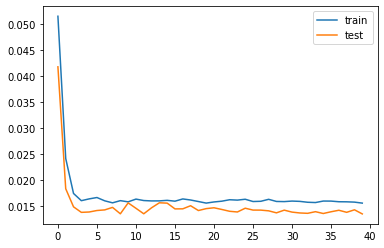

In [0]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

After the model is fit, we can forecast for the entire test dataset. We combine the forecast with the test dataset and invert the scaling. We also invert scaling on the test dataset with the expected pollution numbers. With forecasts and actual values in their original scale, we can then calculate an error score for the model. In this case, we calculate the Root Mean Squared Error (RMSE) that gives error in the same units as the variable itself.

In [0]:
yhat = model.predict(test_X) # making the prediction 
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2])) # inverting the scaling for the forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1) # inverting the scaling for forecast
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y = test_y.reshape((len(test_y), 1)) # inverting scaling for the actual data
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.482

### References:

##### IMDB Example:
   - https://www.tensorflow.org/text/tutorials/text_classification_rnn
   - https://www.tensorflow.org/guide/keras/masking_and_padding
   - https://www.tensorflow.org/text/guide/word_embeddings#:~:text=The%20Embedding%20layer%20takes%20the,batch%2C%20sequence%2C%20embedding)%20.
   
##### Time Series Example (Weather Forecast):
   - https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
   - https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
   
##### Other Sources:
   - Goodfellow, Ian and Bengio, Yoshua and Courville, Aaron (2016). Deep Learning. MIT Press.
   - Chollet, Francois. Deep Learning with Python, 2018. Print.